In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2023-09-04 11:30:26--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-09-04 11:30:26 (114 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

unzip_data("10_food_classes_10_percent.zip")

--2023-09-04 11:30:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   199MB/s    in 0.8s    

2023-09-04 11:30:29 (199 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [ ]:
train_dir = "/content/10_food_classes_10_percent/train/"
test_dir = "/content/10_food_classes_10_percent/test/"

In [ ]:
import tensorflow as tf

IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_data_10percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical")

valid_data_10percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                           image_size=IMAGE_SIZE,
                                                                           batch_size=BATCH_SIZE,
                                                                           label_mode="categorical")

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
train_data_10percent, train_data_10percent.class_names

(<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))>,
 ['chicken_curry',
  'chicken_wings',
  'fried_rice',
  'grilled_salmon',
  'hamburger',
  'ice_cream',
  'pizza',
  'ramen',
  'steak',
  'sushi'])

In [ ]:
# Construct the model using applications API
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)

base_model.trainable=False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

x = base_model(inputs)
print(f"Shape after Input layer: {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D")(x)
print(f"Shape after Global Average Pooling 2D Layer: {x.shape}")

outputs = tf.keras.layers.Dense(10, activation="softmax", name="output_layer")(x)

model_0 = tf.keras.Model(inputs, outputs)

# Compile the Model
model_0.compile(loss="categorical_crossentropy",
                   optimizer="Adam",
                   metrics=["accuracy"])

# Fit the Model
history_base = model_0.fit(train_data_10percent,
                              epochs=5,
                              steps_per_epoch=len(train_data_10percent),
                              validation_data=valid_data_10percent,
                              validation_steps=int(0.25*len(valid_data_10percent)),
                              callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                                     experiment_name="model_0")])

24274472/24274472 [==============================] - 0s 0us/step
Shape after Input layer: (None, 7, 7, 1280)
Shape after Global Average Pooling 2D Layer: (None, 1280)
Saving TensorBoard log files to: transfer_learning/model_0/20230625-155334
Epoch 1/5
24/24 [==============================] - 35s 382ms/step - loss: 1.8785 - accuracy: 0.4133 - val_loss: 1.3318 - val_accuracy: 0.6974
Epoch 2/5
24/24 [==============================] - 4s 135ms/step - loss: 1.1373 - accuracy: 0.7533 - val_loss: 0.9096 - val_accuracy: 0.7895
Epoch 3/5
24/24 [==============================] - 5s 203ms/step - loss: 0.8512 - accuracy: 0.8120 - val_loss: 0.7332 - val_accuracy: 0.8207
Epoch 4/5
24/24 [==============================] - 5s 173ms/step - loss: 0.7076 - accuracy: 0.8440 - val_loss: 0.6522 - val_accuracy: 0.8273
Epoch 5/5
24/24 [==============================] - 4s 152ms/step - loss: 0.5844 - accuracy: 0.8747 - val_loss: 0.5745 - val_accuracy: 0.8405


In [ ]:
model_0.evaluate(valid_data_10percent)

79/79 [==============================] - 6s 74ms/step - loss: 0.5738 - accuracy: 0.8556


[0.5738092064857483, 0.8555999994277954]

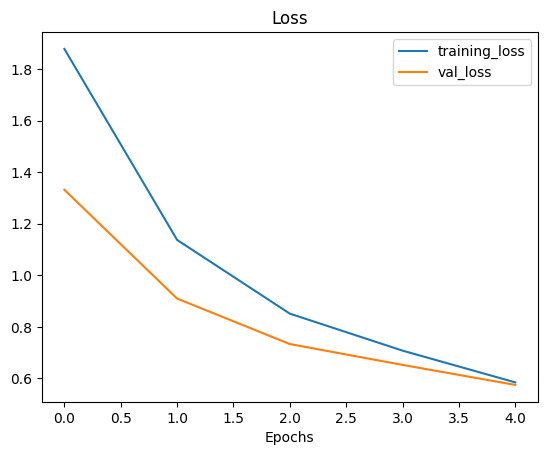

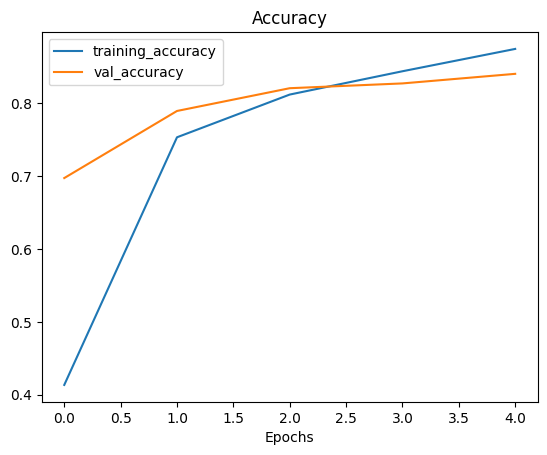

In [ ]:
plot_loss_curves(history_base)

In [ ]:
# Download and unzip data
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
unzip_data("10_food_classes_1_percent.zip")

# Create training and test dirs
train_dir_1percent = "10_food_classes_1_percent/train/"
test_dir_1percent = "10_food_classes_1_percent/test/"

--2023-06-25 15:54:41--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_1_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.202.128, 74.125.69.128, 64.233.182.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133612354 (127M) [application/zip]
Saving to: ‘10_food_classes_1_percent.zip’

10_food_classes_1_p 100%[===================>] 127.42M   121MB/s    in 1.1s    

2023-06-25 15:54:42 (121 MB/s) - ‘10_food_classes_1_percent.zip’ saved [133612354/133612354]



In [ ]:
import tensorflow as tf

IMAGE_SIZE=(224, 224)
BATCH_SIZE=32

train_data_1percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir_1percent,
                                                                          label_mode="categorical",
                                                                          image_size=IMAGE_SIZE,
                                                                          batch_size=BATCH_SIZE
                                                                          )
test_data_1percent = tf.keras.preprocessing.image_dataset_from_directory(test_dir_1percent,
                                                                         label_mode="categorical",
                                                                         image_size=IMAGE_SIZE,
                                                                         batch_size=BATCH_SIZE
                                                                         )

Found 70 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="augmentation_layer")

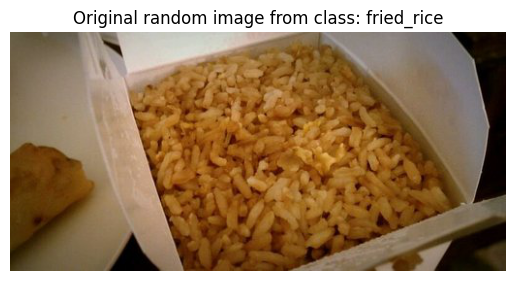

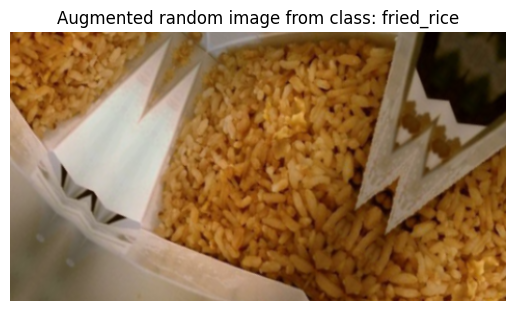

In [ ]:
# View a random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
target_class = random.choice(train_data_1percent.class_names) # choose a random class
target_dir = "10_food_classes_1_percent/train/" + target_class # create the target directory
random_image = random.choice(os.listdir(target_dir)) # choose a random image from target directory
random_image_path = target_dir + "/" + random_image # create the choosen random image path
img = mpimg.imread(random_image_path) # read in the chosen target image
plt.imshow(img) # plot the target image
plt.title(f"Original random image from class: {target_class}")
plt.axis(False); # turn off the axes

# Augment the image
augmented_img = data_augmentation(tf.expand_dims(img, axis=0)) # data augmentation model requires shape (None, height, width, 3)
plt.figure()
plt.imshow(tf.squeeze(augmented_img)/255.) # requires normalization after augmentation
plt.title(f"Augmented random image from class: {target_class}")
plt.axis(False);

In [ ]:
INPUT_SHAPE = (224, 224, 3)
base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = data_augmentation(inputs)

x = base_model(x,training=False)

x = layers.GlobalAveragePooling2D(name="GlobalAveragePooling2D")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_1 = tf.keras.Model(inputs, outputs)

model_1.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_1 = model_1.fit(train_data_1percent,
                        epochs=5,
                        steps_per_epoch=len(train_data_1percent),
                        validation_data=test_data_1percent,
                        validation_steps=int(0.25*len(test_data_1percent)),
                        callbacks=[create_tensorboard_callback("transfer_learning", "model_1")])

Saving TensorBoard log files to: transfer_learning/model_1/20230625-155447
Epoch 1/5
3/3 [==============================] - 14s 3s/step - loss: 2.4266 - accuracy: 0.1143 - val_loss: 2.2062 - val_accuracy: 0.1530
Epoch 2/5
3/3 [==============================] - 5s 2s/step - loss: 2.1502 - accuracy: 0.2143 - val_loss: 2.0991 - val_accuracy: 0.2582
Epoch 3/5
3/3 [==============================] - 5s 2s/step - loss: 2.0131 - accuracy: 0.3286 - val_loss: 1.9856 - val_accuracy: 0.3618
Epoch 4/5
3/3 [==============================] - 5s 2s/step - loss: 1.8505 - accuracy: 0.5000 - val_loss: 1.8983 - val_accuracy: 0.4194
Epoch 5/5
3/3 [==============================] - 5s 2s/step - loss: 1.7285 - accuracy: 0.5000 - val_loss: 1.8211 - val_accuracy: 0.4490


In [ ]:
model_1.evaluate(test_data_1percent)

79/79 [==============================] - 6s 64ms/step - loss: 1.8498 - accuracy: 0.4300


[1.8498097658157349, 0.4300000071525574]

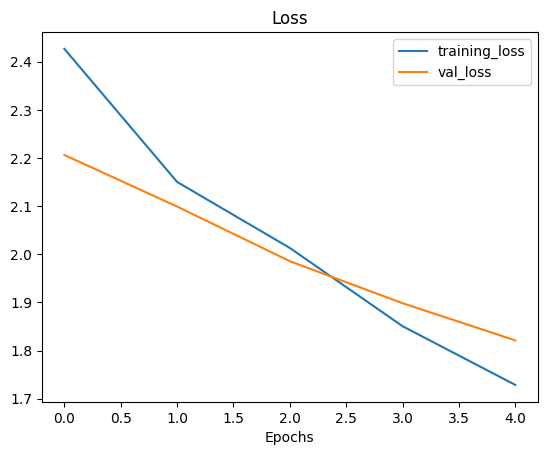

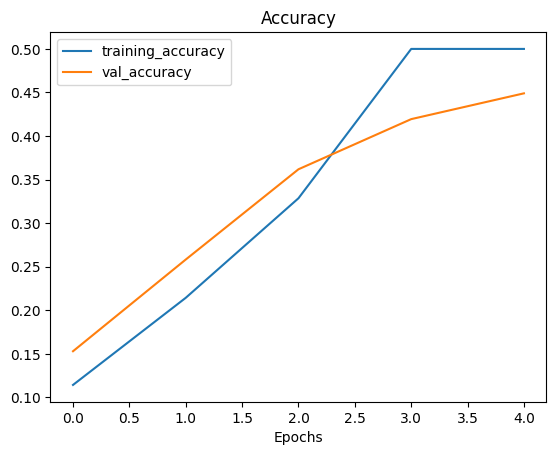

In [ ]:
plot_loss_curves(history_1)

In [ ]:
# Setup checkpoint path
checkpoint_path = "ten_percent_model_checkpoints_weights/checkpoint.ckpt"

# Create a ModelCheckpoint callback that saves the model's weights only
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                         save_weights_only=True,
                                                         save_best_only=True,
                                                         save_freq="epoch",
                                                         verbose=1)

In [ ]:
INPUT_SHAPE = (224, 224, 3)
initial_epochs = 5

data_augmentation = keras.Sequential([
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),
    layers.RandomFlip("horizontal"),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2)
], name="data_augmentation")

base_model = tf.keras.applications.EfficientNetV2B0(include_top=False)
base_model.trainable = False

inputs = layers.Input(shape=INPUT_SHAPE, name="input_layer")
x = data_augmentation(inputs)
x = base_model(x, training=False)

x = layers.GlobalAveragePooling2D(name="Global_Avg_Pooling_2D")(x)

outputs = layers.Dense(10, activation="softmax", name="output_layer")(x)

model_2 = keras.Model(inputs, outputs)

model_2.compile(loss="categorical_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

history_2 = model_2.fit(train_data_10percent,
                        epochs=initial_epochs,
                        steps_per_epoch=len(train_data_10percent),
                        validation_data=valid_data_10percent,
                        validation_steps=int(0.25*len(valid_data_10percent)),
                        callbacks=[create_tensorboard_callback("transfer learning", "model_2"), checkpoint_callback])

Saving TensorBoard log files to: transfer learning/model_2/20230625-155533
Epoch 1/5
24/24 [==============================] - ETA: 0s - loss: 1.9604 - accuracy: 0.3493
Epoch 1: val_loss improved from inf to 1.42761, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 29s 879ms/step - loss: 1.9604 - accuracy: 0.3493 - val_loss: 1.4276 - val_accuracy: 0.6612
Epoch 2/5
24/24 [==============================] - ETA: 0s - loss: 1.3395 - accuracy: 0.6707
Epoch 2: val_loss improved from 1.42761 to 1.01292, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 20s 794ms/step - loss: 1.3395 - accuracy: 0.6707 - val_loss: 1.0129 - val_accuracy: 0.7516
Epoch 3/5
24/24 [==============================] - ETA: 0s - loss: 1.0624 - accuracy: 0.7680
Epoch 3: val_loss improved from 1.01292 to 0.79826, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [=============

In [ ]:
model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b0 (Function  (None, None, None, 1280)  5919312  
 al)                                                             
                                                                 
 Global_Avg_Pooling_2D (Glob  (None, 1280)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                           

In [ ]:
base_model.trainable = True

for layer in base_model.layers[:-10]:
  layer.trainable=False

# Recompile the Model
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

history_fine_tuned_10percent = model_2.fit(train_data_10percent,
                                   epochs=initial_epochs+5,
                                   steps_per_epoch=len(train_data_10percent),
                                   initial_epoch=history_2.epoch[-1],
                                   validation_data=valid_data_10percent,
                                   validation_steps=int(0.25*len(valid_data_10percent)),
                                   callbacks=[create_tensorboard_callback("transfer learning", "fineTuned_model2"),checkpoint_callback])

Saving TensorBoard log files to: transfer learning/fineTuned_model2/20230625-155718
Epoch 5/10
24/24 [==============================] - ETA: 0s - loss: 0.6785 - accuracy: 0.8227
Epoch 5: val_loss improved from 0.62411 to 0.48145, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 31s 813ms/step - loss: 0.6785 - accuracy: 0.8227 - val_loss: 0.4815 - val_accuracy: 0.8602
Epoch 6/10
24/24 [==============================] - ETA: 0s - loss: 0.5465 - accuracy: 0.8387
Epoch 6: val_loss improved from 0.48145 to 0.46565, saving model to ten_percent_model_checkpoints_weights/checkpoint.ckpt
24/24 [==============================] - 13s 540ms/step - loss: 0.5465 - accuracy: 0.8387 - val_loss: 0.4656 - val_accuracy: 0.8388
Epoch 7/10
24/24 [==============================] - ETA: 0s - loss: 0.5299 - accuracy: 0.8387
Epoch 7: val_loss did not improve from 0.46565
24/24 [==============================] - 12s 476ms/step - loss: 0.5299 - accura

In [ ]:
results_fineTuned = model_2.fit(valid_data_10percent)

79/79 [==============================] - 36s 440ms/step - loss: 0.5646 - accuracy: 0.8100


In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two model history objects.
    """
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.34933334589004517, 0.6706666946411133, 0.7680000066757202, 0.7786666750907898, 0.8053333163261414, 0.8226666450500488, 0.8386666774749756, 0.8386666774749756, 0.8493333458900452, 0.8773333430290222, 0.862666666507721]


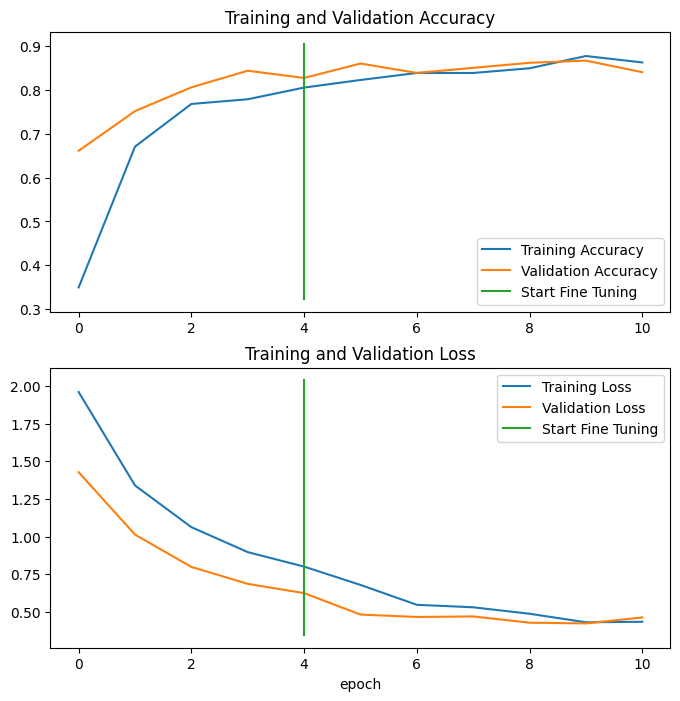

In [ ]:
compare_historys(history_2, history_fine_tuned_10percent)

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
unzip_data("10_food_classes_all_data.zip")

# Setup data directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# How many images are we working with now?
walk_through_dir("10_food_classes_all_data")

In [ ]:
import tensorflow as tf
IMG_SIZE = (224, 224)
train_data_full = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                      label_mode="categorical",
                                                                      image_size=IMG_SIZE)

test_data_full = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                     label_mode="categorical",
                                                                     image_size=IMG_SIZE)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
model_2.evaluate(test_data_full)

79/79 [==============================] - 7s 80ms/step - loss: 0.3518 - accuracy: 0.8828


[0.3517880439758301, 0.8827999830245972]

In [ ]:
checkpoint_dir = "ten_percent_model_checkpoints_weights"
latest_weights = tf.train.latest_checkpoint(checkpoint_dir)

model_2.load_weights(latest_weights)

In [ ]:
model_2.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=["accuracy"])

history_full = model_2.fit(train_data_full,
                           epochs=initial_epochs+5,
                           validation_data=test_data_full,
                           validation_steps=int(0.25*len(test_data_full)),
                           initial_epoch = history_2.epoch[-1],
                           callbacks=[create_tensorboard_callback("transfer learning", "all data")])

Saving TensorBoard log files to: transfer learning/all data/20230625-161348
Epoch 5/10
24/24 [==============================] - 24s 517ms/step - loss: 0.4518 - accuracy: 0.8520 - val_loss: 0.5008 - val_accuracy: 0.8405
Epoch 6/10
24/24 [==============================] - 11s 438ms/step - loss: 0.3979 - accuracy: 0.8813 - val_loss: 0.4654 - val_accuracy: 0.8569
Epoch 7/10
24/24 [==============================] - 14s 565ms/step - loss: 0.3634 - accuracy: 0.8893 - val_loss: 0.4384 - val_accuracy: 0.8586
Epoch 8/10
24/24 [==============================] - 11s 431ms/step - loss: 0.3520 - accuracy: 0.8987 - val_loss: 0.4178 - val_accuracy: 0.8684
Epoch 9/10
24/24 [==============================] - 10s 394ms/step - loss: 0.3322 - accuracy: 0.8907 - val_loss: 0.4300 - val_accuracy: 0.8635
Epoch 10/10
24/24 [==============================] - 11s 428ms/step - loss: 0.2989 - accuracy: 0.9147 - val_loss: 0.4680 - val_accuracy: 0.8569


In [ ]:
model_2.evaluate(test_data_full)

79/79 [==============================] - 7s 82ms/step - loss: 0.4242 - accuracy: 0.8616


[0.4242013096809387, 0.8615999817848206]

6
12
[0.8226666450500488, 0.8386666774749756, 0.8386666774749756, 0.8493333458900452, 0.8773333430290222, 0.862666666507721, 0.8519999980926514, 0.8813333511352539, 0.8893333077430725, 0.8986666798591614, 0.890666663646698, 0.9146666526794434]


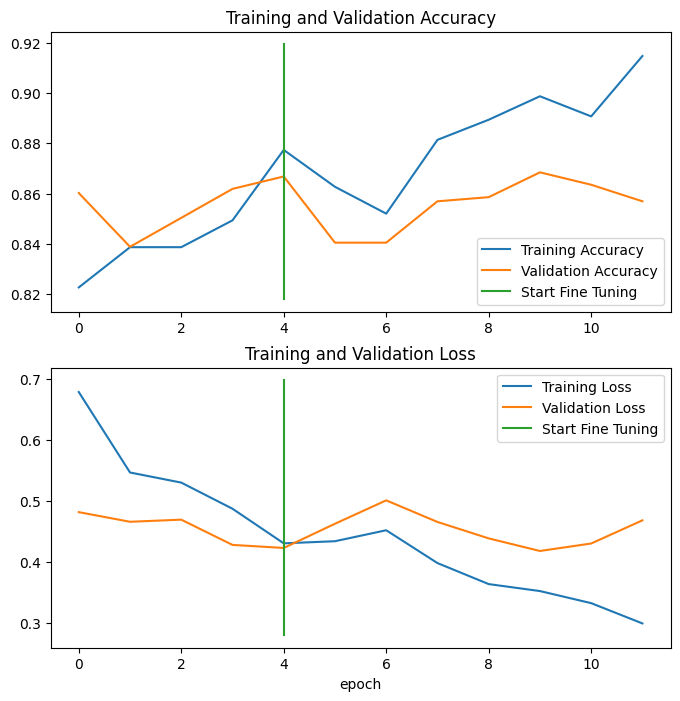

In [ ]:
compare_historys(history_fine_tuned_10percent, history_full)